# Import Necessary Libraries and Datasets:

In [1]:
 #Step-1: Importing libraries and datasets

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# Import Dataset

df = pd.read_csv("/content/drive/MyDrive/Data Science Projects/Customer Lifetime Value Analysis/customer_acquisition_data.csv")

df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [3]:
df.drop(columns = 'customer_id', inplace= True)
df

,channel,cost,conversion_rate,revenue
0,referral,8.320327,0.123145,4199
1,paid advertising,30.450327,0.016341,3410
2,email marketing,5.246263,0.043822,3164
3,social media,9.546326,0.167592,1520
4,referral,8.320327,0.123145,2419
...,...,...,...,...
795,social media,9.546326,0.167592,2813
796,email marketing,5.246263,0.043822,3439
797,social media,9.546326,0.167592,2101
798,paid advertising,30.450327,0.016341,813


In [4]:
df.isnull().sum()

channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [5]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for column in categorical_columns:
    # Print the column name and the number of unique classes
    print(f"Column: {column}")
    print(f"Number of unique classes: {df[column].nunique()}")

    # Print the value counts for each unique class
    print("Value counts:")
    print(df[column].value_counts())

    # Add a separator for better readability
    print("-" * 30)


Column: channel
Number of unique classes: 4
Value counts:
email marketing     214
referral            207
paid advertising    194
social media        185
Name: channel, dtype: int64
------------------------------


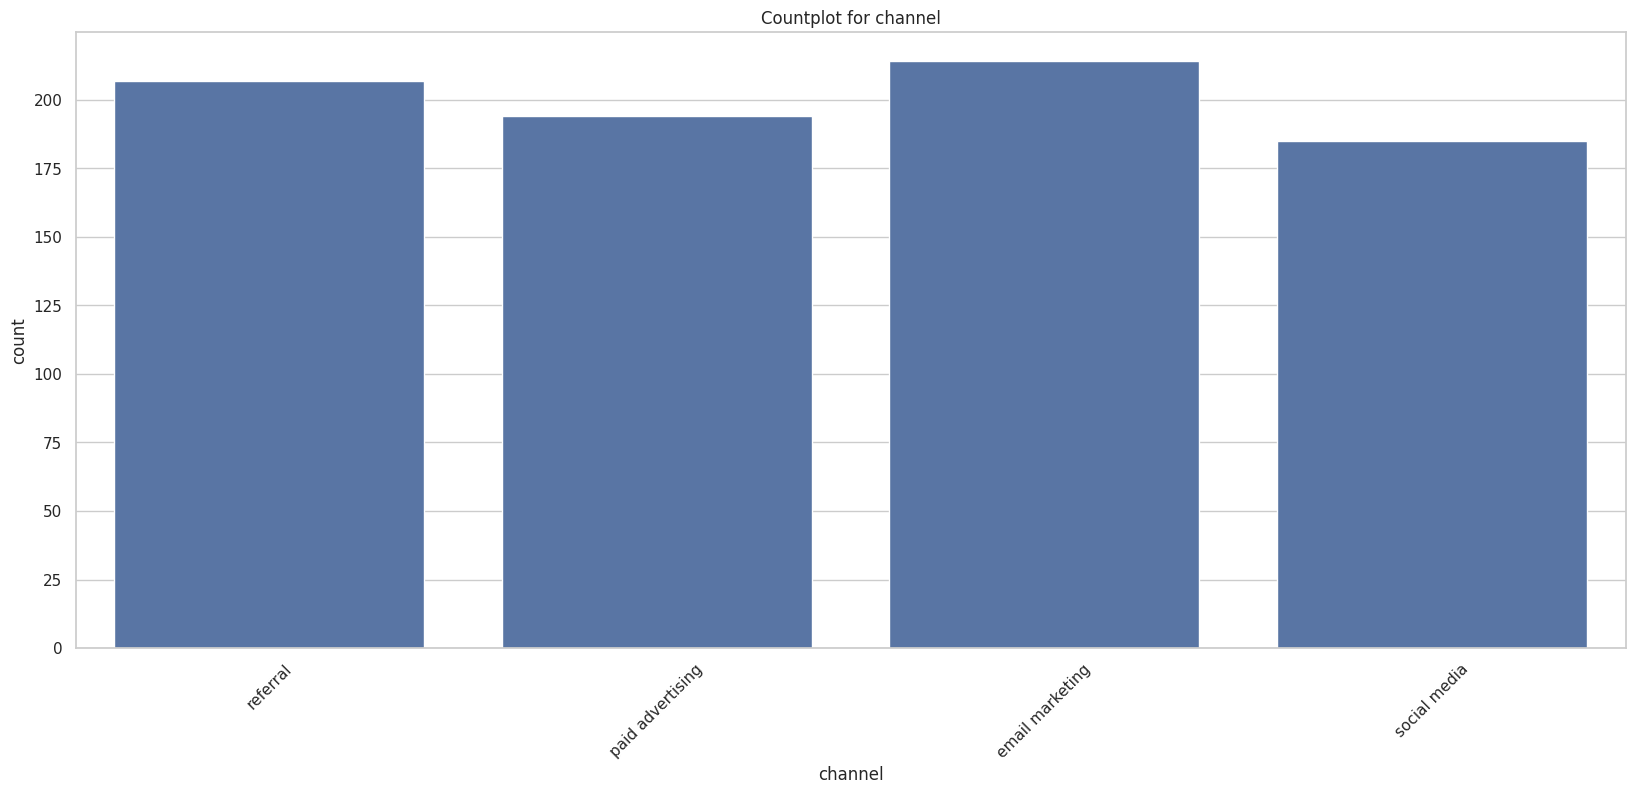

In [6]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Loop through each categorical column
for column in categorical_columns:
    # Create a countplot for the current column
    plt.figure(figsize=(20,8 ))
    sns.countplot(data=df, x=column)

    # Set the title of the plot
    plt.title(f'Countplot for {column}')

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


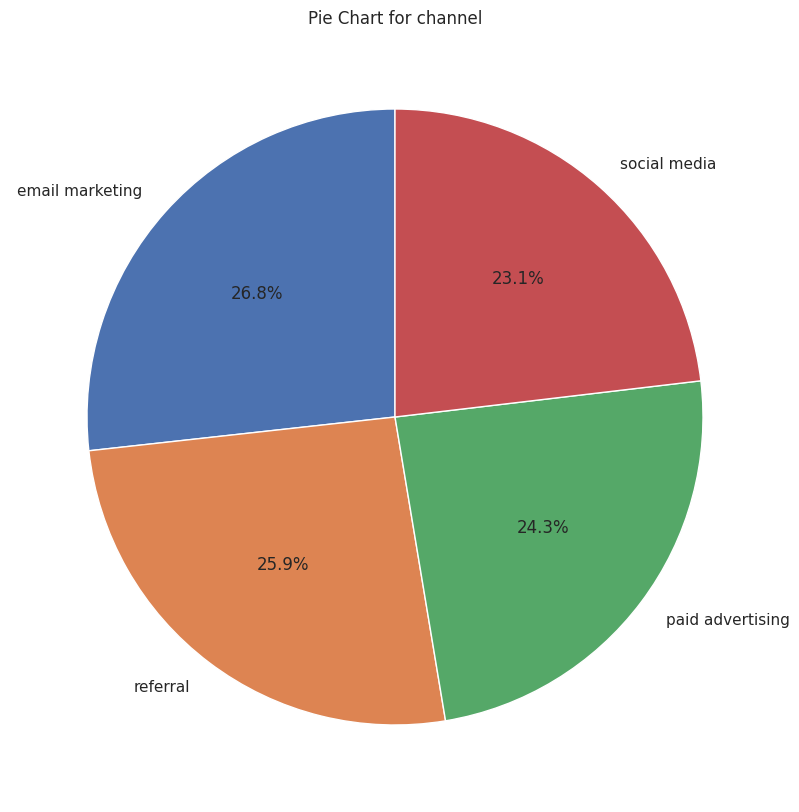

In [7]:
# Loop through each categorical column
for column in categorical_columns:
    # Calculate value counts for the current column
    value_counts = df[column].value_counts()

    # Create a pie chart
    plt.figure(figsize=(15, 10))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)

    # Set the title of the pie chart
    plt.title(f'Pie Chart for {column}')

    # Show the pie chart
    plt.show()


In [8]:
df.describe()

,cost,conversion_rate,revenue
count,800.000000,800.000000,800.000000
mean,13.148052,0.086305,2769.151250
std,9.922337,0.059611,1259.543706
min,5.246263,0.016341,500.000000
25%,5.246263,0.043822,1694.000000
50%,8.320327,0.043822,2764.000000
75%,9.546326,0.123145,3824.250000
max,30.450327,0.167592,4998.000000


In [9]:
from sklearn.preprocessing import OneHotEncoder


# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance with drop='first'
encoder = OneHotEncoder(drop='first')

# Apply one-hot encoding to the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns].astype(str))

# Convert the sparse matrix to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting DataFrame
df_encoded


,cost,conversion_rate,revenue,channel_paid advertising,channel_referral,channel_social media
0,8.320327,0.123145,4199,0.0,1.0,0.0
1,30.450327,0.016341,3410,1.0,0.0,0.0
2,5.246263,0.043822,3164,0.0,0.0,0.0
3,9.546326,0.167592,1520,0.0,0.0,1.0
4,8.320327,0.123145,2419,0.0,1.0,0.0
...,...,...,...,...,...,...
795,9.546326,0.167592,2813,0.0,0.0,1.0
796,5.246263,0.043822,3439,0.0,0.0,0.0
797,9.546326,0.167592,2101,0.0,0.0,1.0
798,30.450327,0.016341,813,1.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

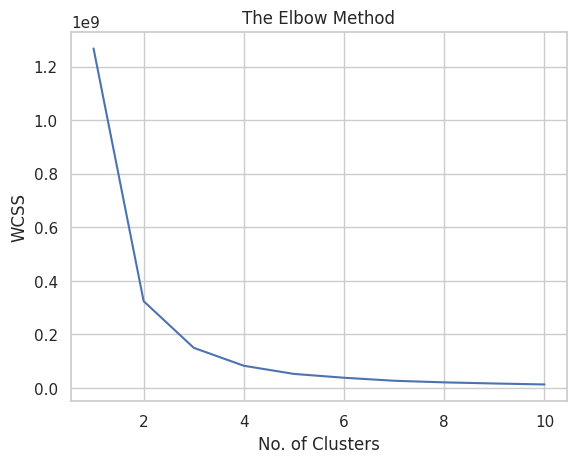

In [10]:
# Using elbow method to find optimal number of clusters
X = df_encoded.iloc[:,:]

from sklearn.cluster import KMeans
wcss = [] #use range from 1 to 10
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# training and predicting with the K-Means model on whole dataset

kmeans = KMeans( n_clusters = 3, init= 'k-means++', random_state=42)
Clusters = kmeans.fit_predict(X)
print(Clusters)

In [12]:
df_1 = df
df_1['Cluster No'] = Clusters

In [13]:
df_1

,channel,cost,conversion_rate,revenue,Cluster No
0,referral,8.320327,0.123145,4199,0
1,paid advertising,30.450327,0.016341,3410,2
2,email marketing,5.246263,0.043822,3164,2
3,social media,9.546326,0.167592,1520,1
4,referral,8.320327,0.123145,2419,2
...,...,...,...,...,...
795,social media,9.546326,0.167592,2813,2
796,email marketing,5.246263,0.043822,3439,0
797,social media,9.546326,0.167592,2101,2
798,paid advertising,30.450327,0.016341,813,1


In [14]:
cluster_groups = df_1.groupby('Cluster No').describe().T
cluster_groups

Cluster No                       0            1            2
cost            count   288.000000   246.000000   266.000000
                mean     13.382386    13.047173    12.987631
                std      10.083680     9.702598     9.979575
                min       5.246263     5.246263     5.246263
                25%       5.246263     8.320327     5.246263
                50%       8.320327     8.320327     8.320327
                75%      30.450327     9.546326     9.546326
                max      30.450327    30.450327    30.450327
conversion_rate count   288.000000   246.000000   266.000000
                mean      0.084709     0.091440     0.083283
                std       0.059262     0.060483     0.059091
                min       0.016341     0.016341     0.016341
                25%       0.016341     0.043822     0.043822
                50%       0.043822     0.123145     0.043822
                75%       0.123145     0.167592     0.123145
                max       0.167592     0.167592     0.167592
revenue         count   288.000000   246.000000   266.000000
                mean   4148.298611  1249.743902  2681.105263
                std     467.501873   405.182231   420.504571
                min    3419.000000   500.000000  1976.000000
                25%    3764.500000   935.000000  2323.250000
                50%    4094.500000  1251.000000  2683.000000
                75%    4562.000000  1575.750000  3039.250000
                max    4998.000000  1962.000000  3410.000000

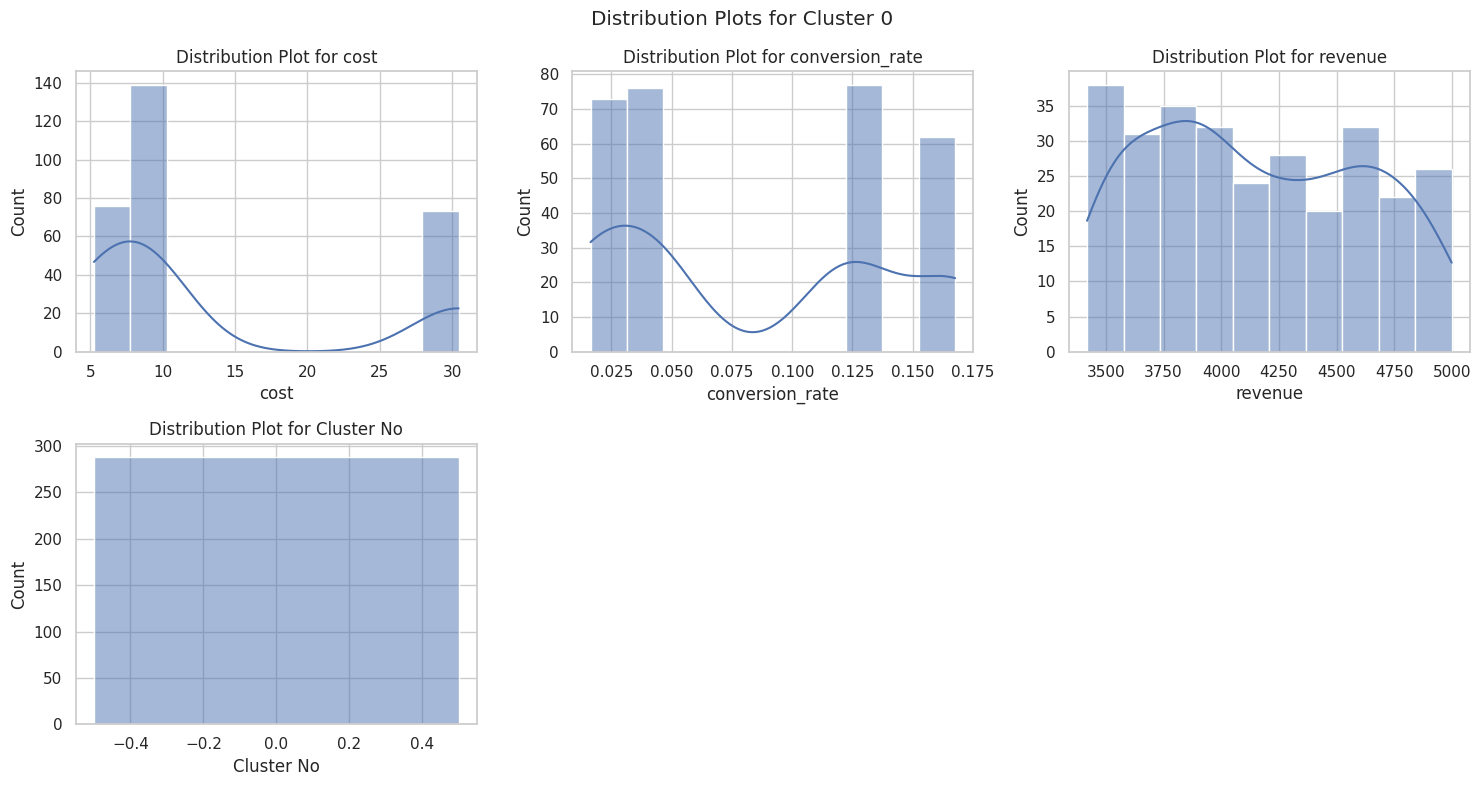

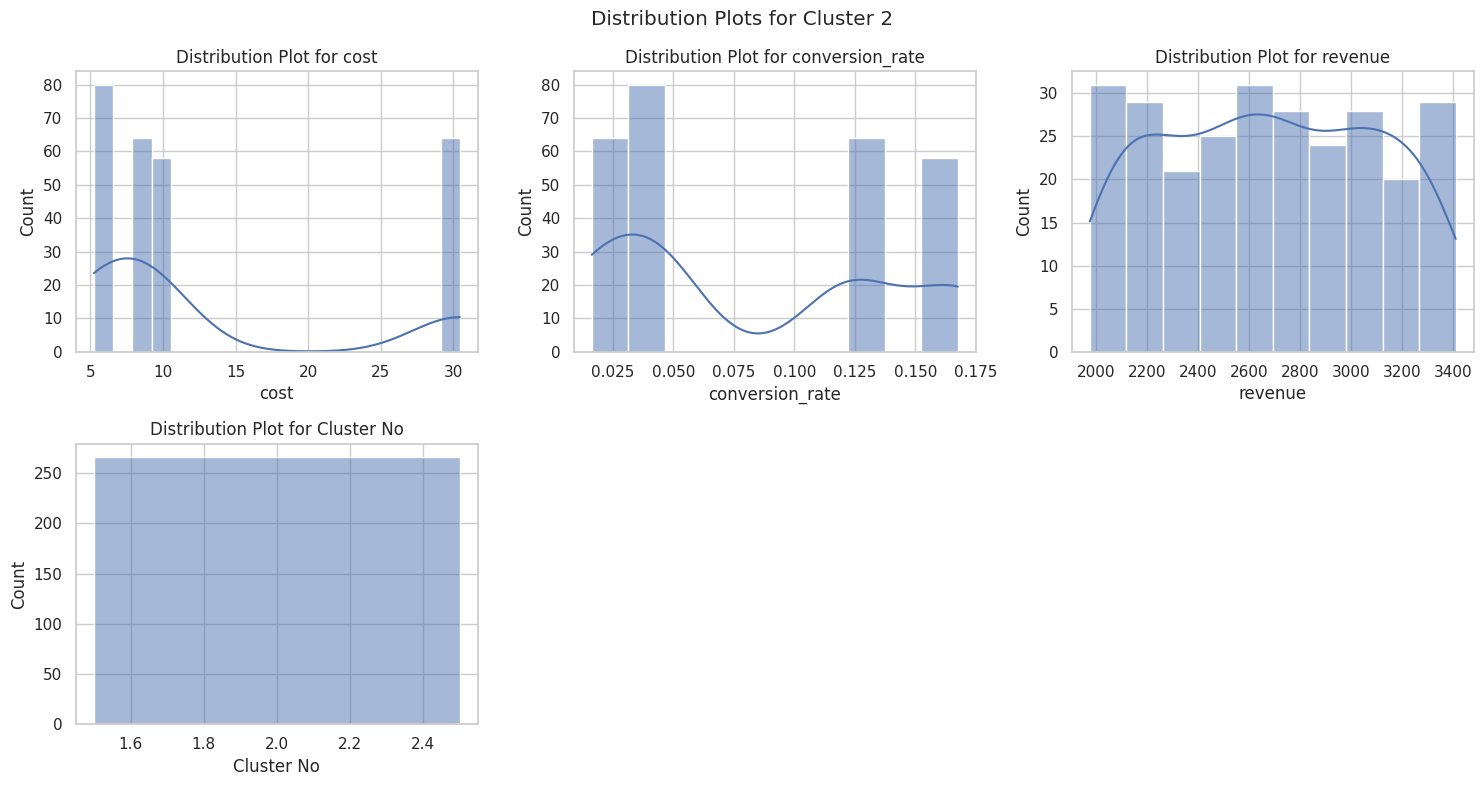

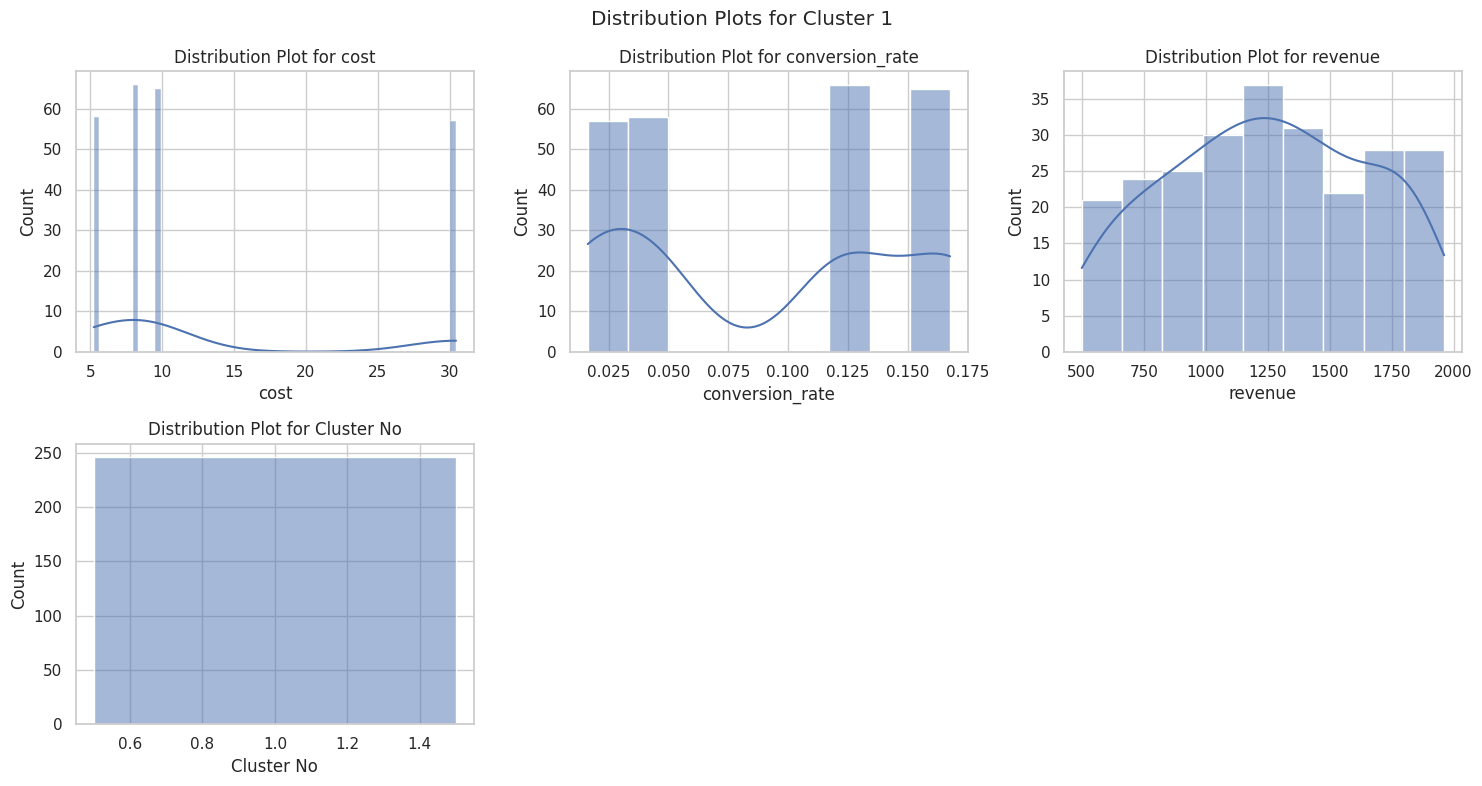

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Loop through each cluster
for cluster in df_1['Cluster No'].unique():
    # Create a DataFrame for the current cluster
    cluster_data = df_1[df_1['Cluster No'] == cluster]

    # Set the size of the plot
    plt.figure(figsize=(15, 8))

    # Loop through each numerical column in the cluster
    for numerical_column in cluster_data.select_dtypes(include='number').columns:
        # Create a distribution plot for the current numerical column in the current cluster
        plt.subplot(2, 3, list(cluster_data.select_dtypes(include='number').columns).index(numerical_column) + 1)
        sns.histplot(data=cluster_data, x=numerical_column, kde=True)

        # Set the title of the plot
        plt.title(f'Distribution Plot for {numerical_column}')

    # Set the title of the entire cluster's plots
    plt.suptitle(f'Distribution Plots for Cluster {cluster}')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()


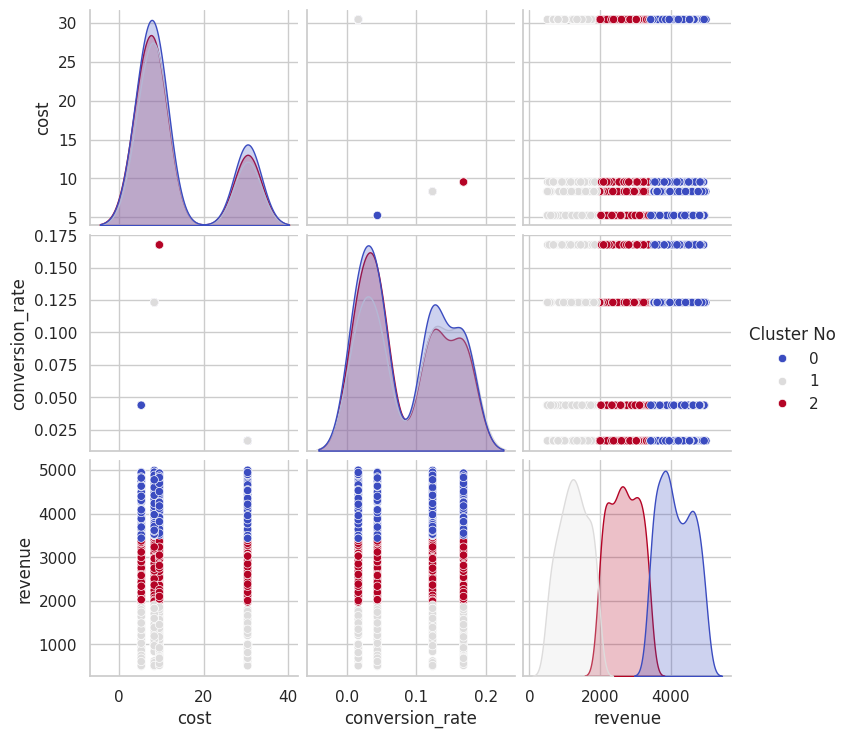

In [16]:
sns.pairplot(df_1, hue='Cluster No', palette='coolwarm')

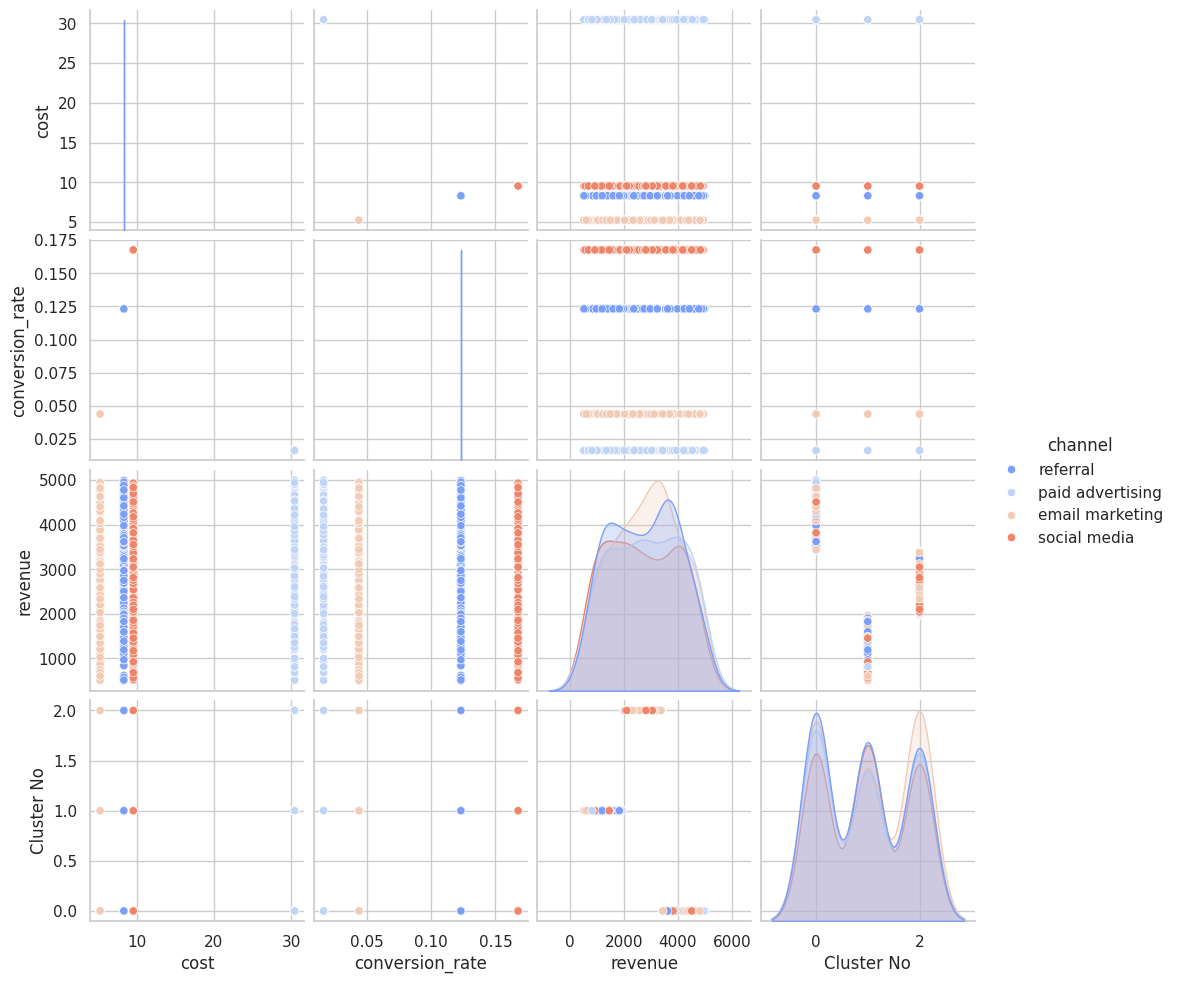

In [25]:
sns.pairplot(df_1, hue='channel', palette='coolwarm')

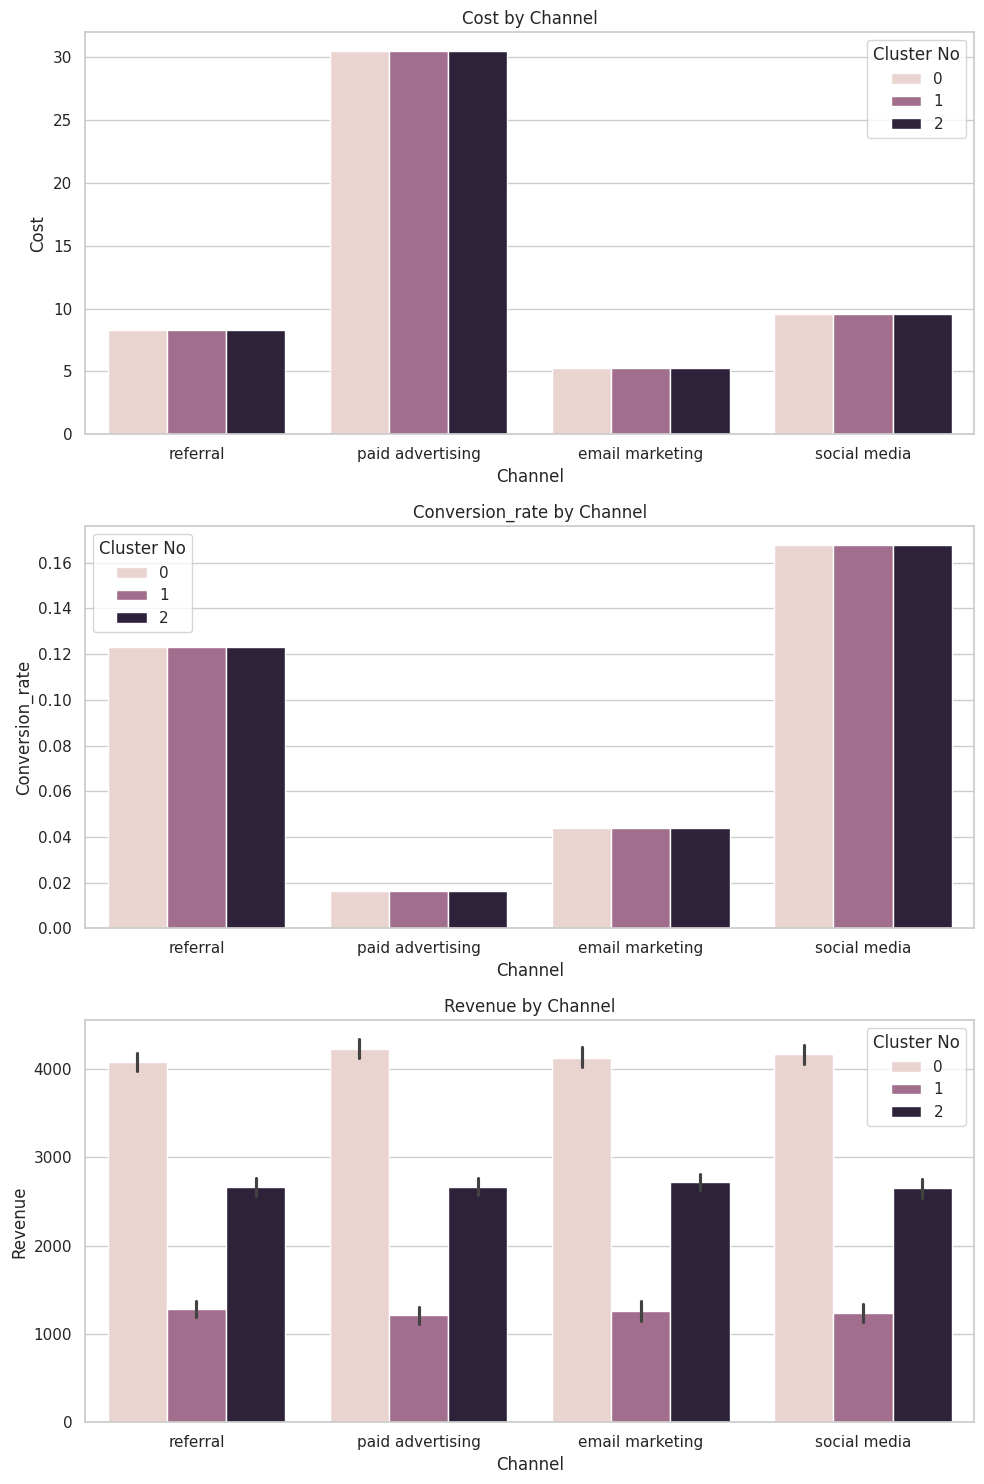

In [26]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Iterate over each column and create a bar chart
columns = ['cost', 'conversion_rate', 'revenue']
for i, column in enumerate(columns):
    ax = axes[i]
    sns.barplot(x='channel', y=column, hue='Cluster No', data=df, ax=ax)
    ax.set_title(f'{column.capitalize()} by Channel')
    ax.set_xlabel('Channel')
    ax.set_ylabel(column.capitalize())
    ax.legend(title='Cluster No')

# Adjust layout
plt.tight_layout()
plt.show()
